In [2]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

data = pd.read_csv('UK_monthly_gdp.csv')
print(data.head())

  Time Period  GDP Growth
0    /01/2020         0.3
1    /02/2020        -0.5
2    /03/2020        -7.0
3    /04/2020       -20.9
4    /05/2020         3.2


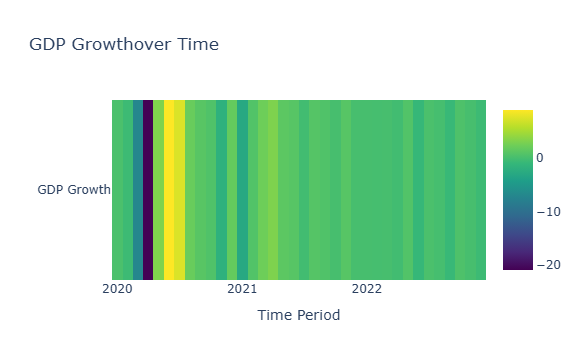

In [24]:
fig = go.Figure(data=go.Heatmap(
    z=[data['GDP Growth']],
    x=data.index,
    y=['GDP Growth'],
    colorscale='viridis'))
fig.update_layout(title='GDP Growthover Time',
                  xaxis_title='Time Period',
                  yaxis_title='')
fig.show()

In [29]:
# Convert monthly data to quarterly data using resample method
data['Time Period'] = pd.to_datetime(data['Time Period'], format='%m/%y')
data.set_index('Time Period', inplace=True)
quarterly_data = data.resample('Q').mean()
print(quarterly_data.head())

KeyError: 'Time Period'

In [40]:
# Calculate recession based on quarterly GDP growth
quarterly_data['Recession'] = ((quarterly_data['GDP Growth'] < 0) & (quarterly_data['GDP Growth'].shift(1) < 0))

# Fill missing valueswith False ( since the first quarter cannot be in a recession)
quarterly_data['Recession'].fillna(False, inplace=True)

# Plot the GDP growth and recession data
fig = go.Figure()
fig.add_trace(go.Scatter(x=quarterly_data.index,
                         y=quarterly_data['GDP Growth'],
                         name='GDP Growth',
                         line=dict(color='green', width=2)))
fig.add_trace(go.Scatter(x=quarterly_data[quarterly_data['Recession']].index),
                         y=quarterly_data[quarterly_data['Recession']]['GDP Growth'],
                         mode='markers', marker=dict(color='red', size=8, name='Recession'))
fig.update_layout(title='GDP Growth and Recession over Time (Quarterly Data)',
                  xaxis_title='Time Period',
                  yaxis_title='GDP Growth')

fig.show()

TypeError: Figure.add_trace() got an unexpected keyword argument 'y'